In [1]:
import pandas as pd
# import numpy as np
import seaborn as sns
import scipy
from matplotlib import pyplot as plt

In [2]:
edu_spending_datapath = "data/csv/Educational Spending in Public Schools.csv"
arts_edu_policies_datapath = "data/csv/Arts Education Policies.csv"
sp_g4_math_2019_datapath = "data/csv/Standardized Performances - Grade 4 - Mathematics - 2019.csv"
sp_g4_reading_2019_datapath = "data/csv/Standardized Performances - Grade 4 - Reading - 2019.csv"
sp_g8_math_2019_datapath = "data/csv/Standardized Performances - Grade 8 - Mathematics - 2019.csv"
sp_g8_reading_2019_datapath = "data/csv/Standardized Performances - Grade 8 - Reading - 2019.csv"

In [3]:
edu_spending_data = pd.read_csv(edu_spending_datapath, header=1, index_col=0, usecols=range(4))
arts_edu_policies_data = pd.read_csv(arts_edu_policies_datapath, header=1, index_col=0, usecols=range(11))
sp_g4_math_2019_data = pd.read_csv(sp_g4_math_2019_datapath, header=1, index_col=0, usecols=range(6))
sp_g4_reading_2019_data = pd.read_csv(sp_g4_reading_2019_datapath, header=1, index_col=0, usecols=range(6))
sp_g8_math_2019_data = pd.read_csv(sp_g8_math_2019_datapath, header=1, index_col=0, usecols=range(6))
sp_g8_reading_2019_data = pd.read_csv(sp_g8_reading_2019_datapath, header=1, index_col=0, usecols=range(6))

sp_g4_math_2019_data = sp_g4_math_2019_data.add_prefix("g4_math_2019 - ")
sp_g4_reading_2019_data = sp_g4_reading_2019_data.add_prefix("g4_reading_2019 - ")
sp_g8_math_2019_data = sp_g8_math_2019_data.add_prefix("g8_math_2019 - ")
sp_g8_reading_2019_data = sp_g8_reading_2019_data.add_prefix("g8_reading_2019 - ")

In [75]:
data = pd.concat([edu_spending_data, arts_edu_policies_data, sp_g4_math_2019_data, sp_g4_reading_2019_data, sp_g8_math_2019_data, sp_g8_reading_2019_data], axis=1)

data = data[data.columns.drop(list(data.filter(regex='SigSymbol')))]

data = data.dropna()

data['Spending Per Pupil'] = data['Spending Per Pupil'].str.replace('[$,]', '', regex=True).astype('int')
data['Funding Per Pupil'] = data['Funding Per Pupil'].str.replace('[$,]', '', regex=True).astype('int')
data['Differential'] = data['Differential'].str.replace('[$,]', '', regex=True).astype('int')

data = data.replace(to_replace = ['Yes','No'],value = [1, 0])

data = data.replace(to_replace = '#',value = 0)

for col in data.columns:
    data[col] = pd.to_numeric(data[col])

# data

In [76]:
corr = data.corr()
corr

Spending Per Pupil  \
Spending Per Pupil                                            1.000000   
Funding Per Pupil                                             0.982086   
Differential                                                  0.662146   
State defines the arts in statute or code as a ...           -0.116350   
State adopted early childhood or prekindergarte...                 NaN   
State adopted elementary and/or secondary arts ...                 NaN   
State requires districts or schools to offer ar...           -0.174677   
State requires districts or schools to offer ar...           -0.174677   
State requires districts or schools to offer ar...           -0.096552   
State includes arts courses as an option to ful...           -0.096815   
State requires state-, district- or school-leve...            0.174628   
State specifies arts education as a requirement...           -0.120618   
State provides funding for an arts education gr...           -0.192852   
g4_math_2019 - Score (MN)                                     0.084530   
g4_math_2019 - Difference from National Public ...            0.084530   
g4_math_2019 - At or Above Basic (AB)                        -0.008018   
g4_math_2019 - At or Above Proficient (AP)                    0.129684   
g4_reading_2019 - Score (MN)                                  0.145390   
g4_reading_2019 - Difference from National Publ...            0.154407   
g4_reading_2019 - At or Above Basic (AB)                      0.105382   
g4_reading_2019 - At or Above Proficient (AP)                 0.240857   
g8_math_2019 - Score (MN)                                     0.170077   
g8_math_2019 - Difference from National Public ...            0.168411   
g8_math_2019 - At or Above Basic (AB)                         0.082831   
g8_math_2019 - At or Above Proficient (AP)                    0.260821   
g8_reading_2019 - Score (MN)                                  0.180848   
g8_reading_2019 - Difference from National Publ...            0.180848   
g8_reading_2019 - At or Above Basic (AB)                      0.038096   
g8_reading_2019 - At or Above Proficient (AP)                 0.266619   

                                                    Funding Per Pupil  \
Spending Per Pupil                                           0.982086   
Funding Per Pupil                                            1.000000   
Differential                                                 0.791491   
State defines the arts in statute or code as a ...          -0.119091   
State adopted early childhood or prekindergarte...                NaN   
State adopted elementary and/or secondary arts ...                NaN   
State requires districts or schools to offer ar...          -0.219529   
State requires districts or schools to offer ar...          -0.219529   
State requires districts or schools to offer ar...          -0.139126   
State includes arts courses as an option to ful...          -0.107905   
State requires state-, district- or school-leve...           0.163981   
State specifies arts education as a requirement...          -0.106833   
State provides funding for an arts education gr...          -0.206925   
g4_math_2019 - Score (MN)                                    0.070783   
g4_math_2019 - Difference from National Public ...           0.070783   
g4_math_2019 - At or Above Basic (AB)                       -0.046347   
g4_math_2019 - At or Above Proficient (AP)                   0.114197   
g4_reading_2019 - Score (MN)                                 0.128591   
g4_reading_2019 - Difference from National Publ...           0.137810   
g4_reading_2019 - At or Above Basic (AB)                     0.068840   
g4_reading_2019 - At or Above Proficient (AP)                0.216557   
g8_math_2019 - Score (MN)                                    0.125517   
g8_math_2019 - Difference from National Public ...           0.123661   
g8_math_2019 - At or Above Basic (AB)                        0.025454   
g8_mat

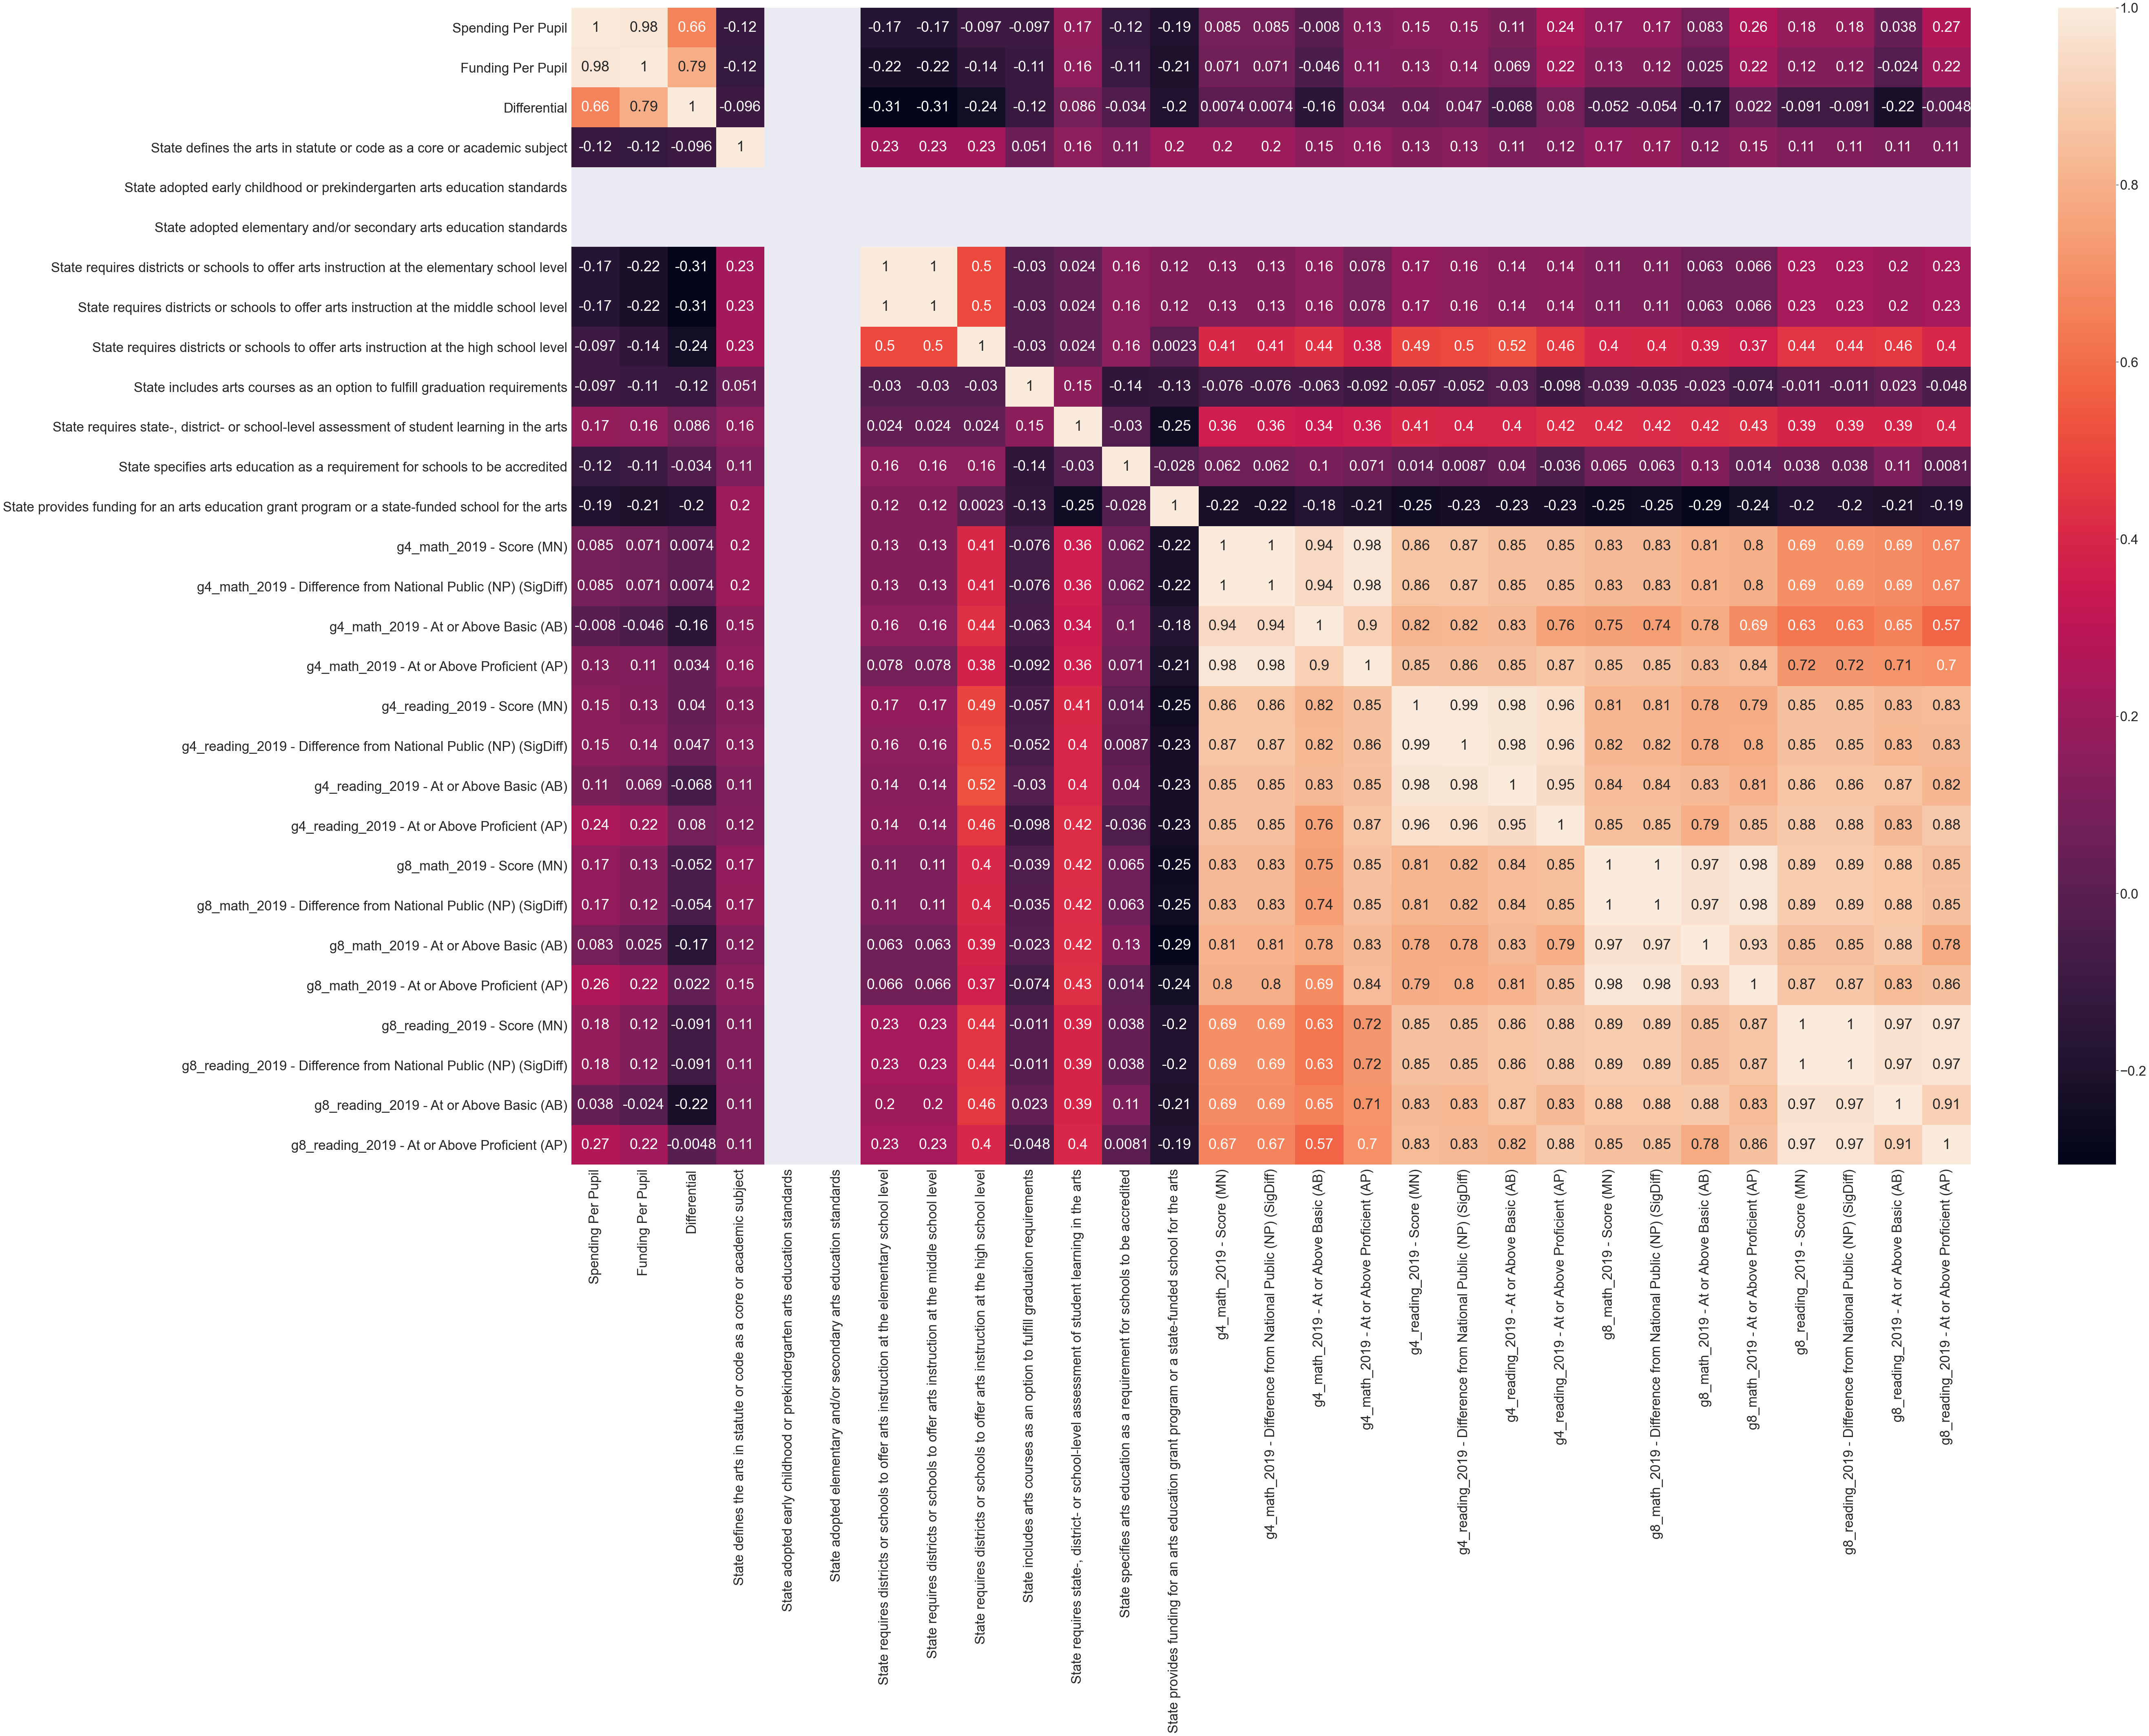

In [74]:
plt.figure(figsize=(80, 60))
sns.set(font_scale = 3)
sns.heatmap(corr, annot=True)
plt.tight_layout()
plt.savefig('correlations.png')
plt.show()

In [109]:
# g= sns.pairplot(df,hue = 'target', diag_kind= 'hist',
#              vars=df.columns[:-1],
#              plot_kws=dict(alpha=0.5), 
#              diag_kws=dict(alpha=0.5))
# plt.show()
# plt.figure(figsize=(80, 80))
pairplot = sns.pairplot(data, vars=data.columns[:-1], height=5)
pairplot.set(xticklabels=[])
pairplot.set(yticklabels=[])
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

plt.tight_layout()
plt.savefig('pairplot.png')
plt.show()

In [80]:
# plt.scatter(df.iloc[:,0], df.iloc[:,1])
# plt.show()

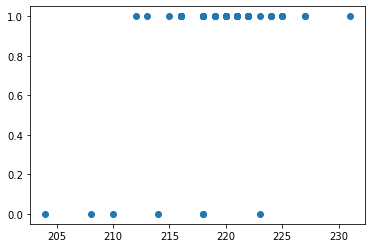

In [8]:
# plt.scatter(df.iloc[:,1], df['art_edu_policy_col_6'])
# plt.show()

In [10]:
# df.corr(method='kendall')

scores_grade4_math  scores_grade4_reading  spending  \
scores_grade4_math               1.000000               0.759131  0.070332   
scores_grade4_reading            0.759131               1.000000  0.144112   
spending                         0.070332               0.144112  1.000000   
art_edu_policy_col_1             0.189559               0.096607 -0.018864   
art_edu_policy_col_2                  NaN                    NaN       NaN   
art_edu_policy_col_3                  NaN                    NaN       NaN   
art_edu_policy_col_4             0.106828               0.089384 -0.140538   
art_edu_policy_col_5             0.106828               0.089384 -0.140538   
art_edu_policy_col_6             0.312267               0.316154 -0.047911   
art_edu_policy_col_7            -0.093829              -0.094500 -0.023638   
art_edu_policy_col_8             0.296183               0.354768  0.187132   
art_edu_policy_col_9             0.087580              -0.016916 -0.044300   
art_edu_policy_col_10           -0.173573              -0.161012 -0.227473   

                       art_edu_policy_col_1  art_edu_policy_col_2  \
scores_grade4_math                 0.189559                   NaN   
scores_grade4_reading              0.096607                   NaN   
spending                          -0.018864                   NaN   
art_edu_policy_col_1               1.000000                   NaN   
art_edu_policy_col_2                    NaN                   1.0   
art_edu_policy_col_3                    NaN                   NaN   
art_edu_policy_col_4               0.227843                   NaN   
art_edu_policy_col_5               0.227843                   NaN   
art_edu_policy_col_6               0.227843                   NaN   
art_edu_policy_col_7               0.050880                   NaN   
art_edu_policy_col_8               0.162281                   NaN   
art_edu_policy_col_9               0.111979                   NaN   
art_edu_policy_col_10              0.199060                   NaN   

                       art_edu_policy_col_3  art_edu_policy_col_4  \
scores_grade4_math                      NaN              0.106828   
scores_grade4_reading                   NaN              0.089384   
spending                                NaN             -0.140538   
art_edu_policy_col_1                    NaN              0.227843   
art_edu_policy_col_2                    NaN                   NaN   
art_edu_policy_col_3                    1.0                   NaN   
art_edu_policy_col_4                    NaN              1.000000   
art_edu_policy_col_5                    NaN              1.000000   
art_edu_policy_col_6                    NaN              0.503247   
art_edu_policy_col_7                    NaN             -0.029749   
art_edu_policy_col_8                    NaN              0.024079   
art_edu_policy_col_9                    NaN              0.161165   
art_edu_policy_col_10                   NaN              0.117305   

                       art_edu_policy_col_5  art_edu_policy_col_6  \
scores_grade4_math                 0.106828              0.312267   
scores_grade4_reading              0.089384              0.316154   
spending                          -0.140538             -0.047911   
art_edu_policy_col_1               0.227843              0.227843   
art_edu_policy_col_2                    NaN                   NaN   
art_edu_policy_col_3                    NaN                   NaN   
art_edu_policy_col_4               1.000000              0.503247   
art_edu_policy_col_5               1.000000              0.503247   
art_edu_policy_col_6               0.503247              1.000000   
art_edu_policy_col_7              -0.029749             -0.029749   
art_edu_policy_col_8               0.024079              0.024079   
art_edu_policy_col_9               0.161165              0.161165   
art_edu_policy_col_10              0.117305              0.002256   

                       art_ed

In [11]:
# scipy.stats.pearsonr(df['scores_grade4_math'], df['art_edu_policy_col_6'])

(0.3997508453444213, 0.0036577748170924817)

In [12]:
# scipy.stats.spearmanr(df['scores_grade4_math'], df['art_edu_policy_col_6'])

SpearmanrResult(correlation=0.3690460321657876, pvalue=0.007699508373229228)

In [13]:
# scipy.stats.kendalltau(df['scores_grade4_math'], df['art_edu_policy_col_6'])

KendalltauResult(correlation=0.31226694099082475, pvalue=0.009066152336241801)